In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

**Part 1**

In [168]:
cars = pd.read_csv('Cars93.csv')

**Part 2**

*Clean the data and remove missing values. Drop any column that is not categorical or numeric. Let our target variable be MPG.highway again. Separate the independent variables from the dependent variable.*

In [169]:
cars.dtypes

Unnamed: 0              int64
Manufacturer           object
Model                  object
Type                   object
Min.Price             float64
Price                 float64
Max.Price             float64
MPG.city                int64
MPG.highway             int64
AirBags                object
DriveTrain             object
Cylinders              object
EngineSize            float64
Horsepower              int64
RPM                     int64
Rev.per.mile            int64
Man.trans.avail        object
Fuel.tank.capacity    float64
Passengers              int64
Length                  int64
Wheelbase               int64
Width                   int64
Turn.circle             int64
Rear.seat.room        float64
Luggage.room          float64
Weight                  int64
Origin                 object
Make                   object
dtype: object

In [170]:
cars.dropna(inplace=True)
cars['Cylinders'] = cars['Cylinders'].astype(int)

In [171]:
cars.drop(columns = {'Unnamed: 0'}, inplace = True)

In [172]:
keep_columns = [x for x in cars.columns if x != 'MPG.highway']
X = cars[keep_columns].copy()
Y = cars['MPG.highway'].copy()

**Part 3**

*Generate dummy variables for the categorical features*

In [173]:
# Catgorical: Manufacturer, Make, Model, Type, AirBags, DriveTrain, Cylinders, Man.trans.avail, Origin
X = pd.get_dummies(X, prefix = '', prefix_sep = '', columns = ['Manufacturer', 'Make', 'Model','Type', 'AirBags', 'DriveTrain', 'Cylinders', 'Man.trans.avail', 'Origin'], drop_first = True)

**Part 4**

*Create a training set that's 75% of your data set and a complementary test set with the remaining 25%. Specify random_state=0.*

In [174]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, random_state = 0)

**Part 5**

*Train the model using the LinearRegression class. Leave all parameters at their default values.*

In [175]:
regr = LinearRegression().fit(X_train, Y_train)

**Part 6**

*Use your model to generate predictions on the test set, then create two scatterplots: one with predicted values against actual values, and another with residuals against predicted values. Print the coefficient of determination of the model with the .score() method.*

In [176]:
Y_pred = regr.predict(X_test)

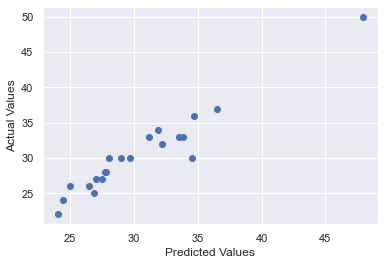

In [182]:
# Predicted values against actual values
sns.set_theme(style = 'darkgrid')
plt.scatter(x = Y_pred, y = Y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

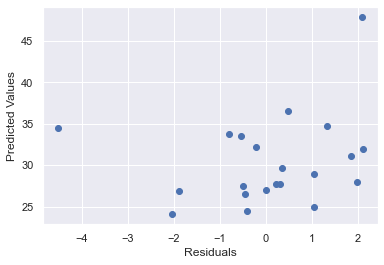

In [186]:
# Residuals against predicted values
residuals = Y_test - Y_pred
sns.set_theme(style = 'darkgrid')
plt.scatter(x = residuals, y = Y_pred)
plt.xlabel('Residuals')
plt.ylabel('Predicted Values')
plt.show()

In [188]:
regr.score(X_test, Y_test)

0.9290340152359196

**Part 7**

*Print out the actual model in equation form, i.e., y = b + c1x1 + c2x2 + c3x3 + ...*

In [231]:
coefficients = list(regr.coef_)
intercept = round(regr.intercept_, 2)
round_coef = []

for i in coefficients:
    round_coef.append(round(i, 2))

equation = f'Y = {intercept}'

for i in range(1, len(round_coef)+1):
    c = round_coef[i-1]
    equation = equation +' + ' + '(' + str(c) + ')' + '*X' + str(i) + ' '
print(equation)

Y = -2.37 + (0.03)*X1  + (-0.04)*X2  + (-0.0)*X3  + (0.84)*X4  + (-0.16)*X5  + (0.01)*X6  + (0.0)*X7  + (-0.0)*X8  + (-0.04)*X9  + (-0.53)*X10  + (0.03)*X11  + (0.14)*X12  + (0.04)*X13  + (0.01)*X14  + (-0.15)*X15  + (0.41)*X16  + (-0.0)*X17  + (0.15)*X18  + (0.59)*X19  + (0.22)*X20  + (0.55)*X21  + (0.88)*X22  + (0.24)*X23  + (-0.48)*X24  + (-0.6)*X25  + (-0.43)*X26  + (-0.72)*X27  + (0.14)*X28  + (-0.2)*X29  + (0.11)*X30  + (0.0)*X31  + (-0.22)*X32  + (-0.14)*X33  + (0.36)*X34  + (0.46)*X35  + (-1.06)*X36  + (-0.6)*X37  + (-0.76)*X38  + (-0.01)*X39  + (0.0)*X40  + (0.61)*X41  + (-0.51)*X42  + (1.03)*X43  + (-0.04)*X44  + (0.36)*X45  + (-0.21)*X46  + (0.87)*X47  + (0.03)*X48  + (-0.66)*X49  + (0.15)*X50  + (-0.0)*X51  + (0.59)*X52  + (0.44)*X53  + (0.0)*X54  + (0.0)*X55  + (-0.22)*X56  + (0.04)*X57  + (0.51)*X58  + (-0.0)*X59  + (-0.45)*X60  + (1.29)*X61  + (0.16)*X62  + (-0.11)*X63  + (0.24)*X64  + (-0.08)*X65  + (-0.4)*X66  + (-0.31)*X67  + (0.0)*X68  + (0.16)*X69  + (-0.4)*X70  + (